In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('insurance_data - insurance_data.csv')

In [4]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [5]:
df.shape

(1340, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [7]:
df.isna().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.drop(columns= ['index'], inplace= True)

In [10]:
df.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [11]:
df= df.set_index(df.PatientID)

In [12]:
df.age.unique()

array([39., 24., nan, 19., 20., 30., 36., 37., 32., 40., 35., 41., 49.,
       48., 45., 34., 18., 42., 50., 23., 58., 29., 21., 52., 43., 47.,
       28., 44., 31., 51., 60., 27., 26., 22., 38., 53., 54., 33., 59.,
       55., 46., 57., 25., 56.])

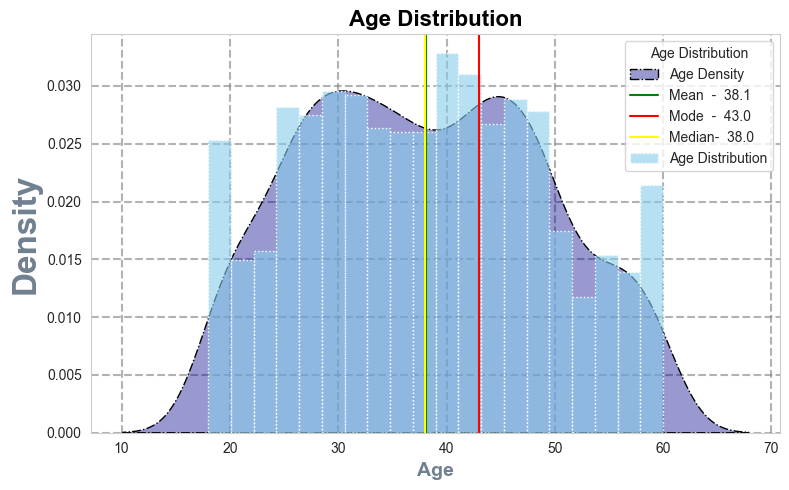

In [13]:
plt.figure(figsize= (8,5))
sns.set_style('whitegrid')
sns.kdeplot(x= df.age, fill= True, linewidth= 1, linestyle= '-.', color= 'darkblue', edgecolor= 'black', alpha=0.4, label= 'Age Density')
sns.histplot(x= df.age, kde= False, stat= 'density', linewidth= 1, linestyle= ':', color= 'skyblue', edgecolor= 'white', alpha= 0.6, bins= 20, label= 'Age Distribution')
plt.axvline(x= df.age.mean(), linewidth= 1.5, linestyle= '-', color= 'green', label= f"{'Mean': <6}- {df.age.mean(): .1f}")
plt.axvline(x= df.age.mode().iloc[0], linewidth= 1.5, linestyle= '-', color= 'red', label= f"{'Mode': <6}- {df.age.mode().iloc[0]: .1f}")
plt.axvline(x= df.age.median(), linewidth= 1.5, linestyle= '-', color= 'yellow', label= f"{'Median': <6}- {df.age.median(): .1f}")

plt.title("Age Distribution", fontsize= 16, fontweight= 'bold', color= 'black')
plt.xlabel("Age", fontsize= 14, fontweight= 'bold', color= 'slategray')
plt.ylabel("Density", fontsize= 24, fontweight= 'bold', color= 'slategray')

plt.grid(True, linewidth= 1.5, linestyle= '--', color= 'grey', alpha= 0.6)
plt.legend(title= 'Age Distribution')
plt.tight_layout()
plt.show()

In [14]:
df.age.fillna(round(df.age.mean(),1), inplace= True)

In [15]:
df.age.unique()

array([39. , 24. , 38.1, 19. , 20. , 30. , 36. , 37. , 32. , 40. , 35. ,
       41. , 49. , 48. , 45. , 34. , 18. , 42. , 50. , 23. , 58. , 29. ,
       21. , 52. , 43. , 47. , 28. , 44. , 31. , 51. , 60. , 27. , 26. ,
       22. , 38. , 53. , 54. , 33. , 59. , 55. , 46. , 57. , 25. , 56. ])

In [16]:
df.age= df.age.astype('int')

In [17]:
df.age.dtype

dtype('int64')

In [18]:
df.isna().sum()

PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [19]:
df.region.unique()

array(['southeast', 'northwest', nan, 'southwest', 'northeast'],
      dtype=object)

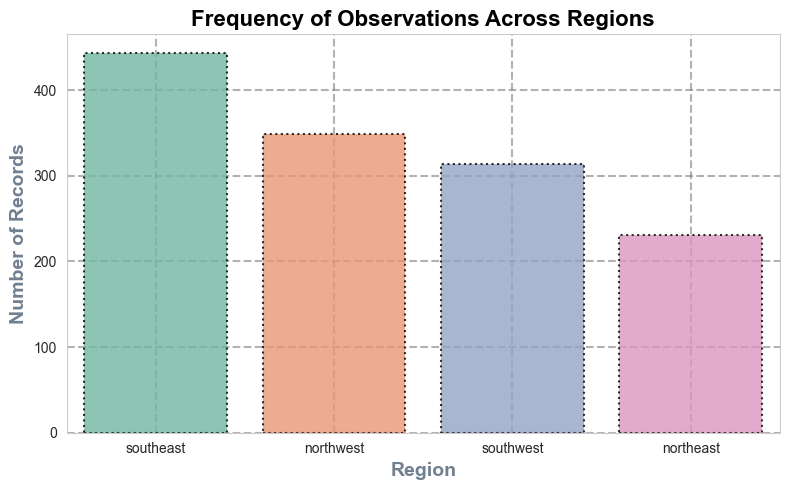

In [20]:
plt.figure(figsize= (8, 5))
sns.set_style('whitegrid')
sns.countplot(x= df.region, linewidth= 1.5, linestyle= ":", palette= 'Set2', edgecolor= 'black', width= 0.8, alpha= 0.8)

plt.title("Frequency of Observations Across Regions", fontsize= 16, fontweight= 'bold', color= 'black')
plt.xlabel("Region", fontsize= 14, fontweight= 'bold', color= 'slategray')
plt.ylabel("Number of Records", fontsize= 14, fontweight= 'bold', color= 'slategray')

plt.grid(True, linewidth= 1.5, linestyle= "--", color= 'grey', alpha= 0.6)
plt.tight_layout()
plt.show()

In [21]:
df.region.mode().iloc[0]

'southeast'

In [22]:
df.region.fillna('southeast', inplace= True)

In [23]:
df.isna().sum()

PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1340 entries, 1 to 1340
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientID      1340 non-null   int64  
 1   age            1340 non-null   int64  
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1340 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 115.2+ KB


In [26]:
df.bmi.head()

PatientID
1    23.2
2    30.1
3    33.3
4    33.7
5    34.1
Name: bmi, dtype: float64

In [27]:
df.diabetic.unique()

array(['Yes', 'No'], dtype=object)

In [28]:
df.diabetic= df.diabetic.map({'Yes': True, "No": False}).astype(bool)

In [29]:
df.diabetic.unique()

array([ True, False])

In [30]:
df.diabetic.dtype

dtype('bool')

In [31]:
df.smoker.unique()

array(['No', 'Yes'], dtype=object)

In [32]:
df.smoker.value_counts()

smoker
No     1066
Yes     274
Name: count, dtype: int64

In [33]:
df.smoker= df.smoker.map({"Yes": True, "No": False}).astype(bool)

In [34]:
df.smoker.value_counts()

smoker
False    1066
True      274
Name: count, dtype: int64

In [35]:
df.claim.head()

PatientID
1    1121.87
2    1131.51
3    1135.94
4    1136.40
5    1137.01
Name: claim, dtype: float64

In [36]:
df.claim.tail()

PatientID
1336    55135.40
1337    58571.07
1338    60021.40
1339    62592.87
1340    63770.43
Name: claim, dtype: float64

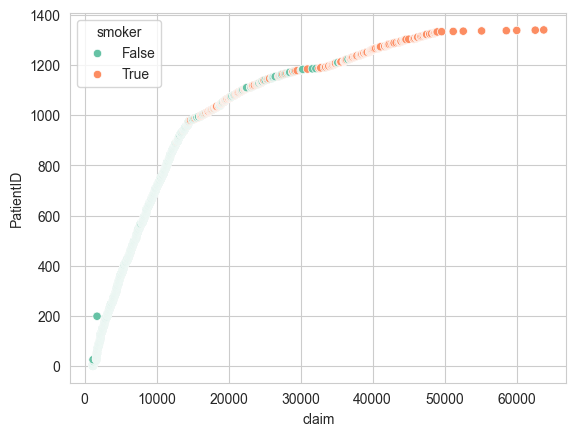

In [37]:
sns.scatterplot(x= df.claim, y= df.index, hue= df.smoker, palette= 'Set2')
plt.show()

In [38]:
df['claim'].head(1000).is_monotonic_increasing

False

In [39]:
df[df.index.isin([198, 199, 200, 201, 202, 203, 1200])]

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
PatientID,,,,,,,,,,
198,198,49,male,26.0,98,True,0,False,northeast,3070.81
199,199,25,male,23.0,81,True,0,False,northeast,1704.57
200,200,38,male,23.8,99,True,2,False,northwest,3077.10
201,201,60,female,25.8,100,True,0,False,southwest,3161.45
202,202,59,female,16.8,96,True,1,False,northeast,3167.46
203,203,52,female,33.1,87,False,0,False,southeast,3171.61
1200,1200,30,female,33.1,93,True,0,True,southeast,34439.86


figsize	Shape	Use When <br>
(6, 4)	Small	Quick EDA <br>
(8, 5)	Standard	Most plots <br>
(12, 8)	Large	Presentation-ready or many elements <br>
(16, 10)	Extra Large	Publication/high-detail plots <br>

## Data Analysis

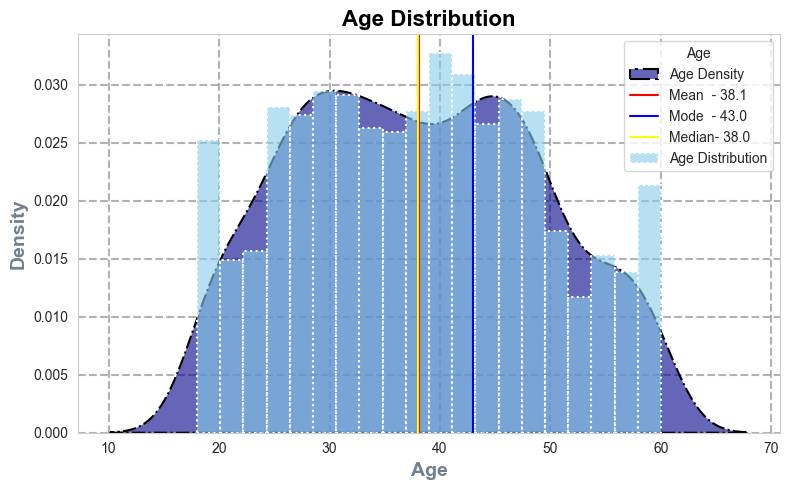

In [55]:
plt.figure(figsize= (8, 5))
sns.set_style('whitegrid')
sns.kdeplot(df.age, fill= True, linewidth= 1.5, linestyle= "-.", color= 'darkblue', edgecolor= 'black', alpha= 0.6, label= 'Age Density')
sns.histplot(df.age, kde= False, stat= "density", linewidth= 1.5, linestyle= ':', color= 'skyblue', edgecolor= 'white', bins= 20, alpha= 0.6, label= 'Age Distribution')
plt.axvline(x= df.age.mean(), linewidth= 1.5, linestyle= '-', color= 'red', label= f"{'Mean':<6}- {df.age.mean():.1f}")
plt.axvline(x= df.age.mode().iloc[0], linewidth= 1.5, linestyle= '-', color= 'blue', label= f"{'Mode':<6}- {df.age.mode().iloc[0]:.1f}")
plt.axvline(x= df.age.median(), linewidth= 1.5, linestyle= '-', color= 'yellow', label= f"{'Median':<6}- {df.age.median():.1f}")

plt.title("Age Distribution", fontsize= 16, fontweight= 'bold', color= 'black')
plt.xlabel("Age", fontsize= 14, fontweight= 'bold', color= 'slategray')
plt.ylabel('Density', fontsize= 14, fontweight= 'bold', color= 'slategray')

plt.grid(True, linewidth= 1.5, linestyle= '--', color= 'grey', alpha= 0.6)
plt.legend(title= "Age")
plt.tight_layout()
plt.show()

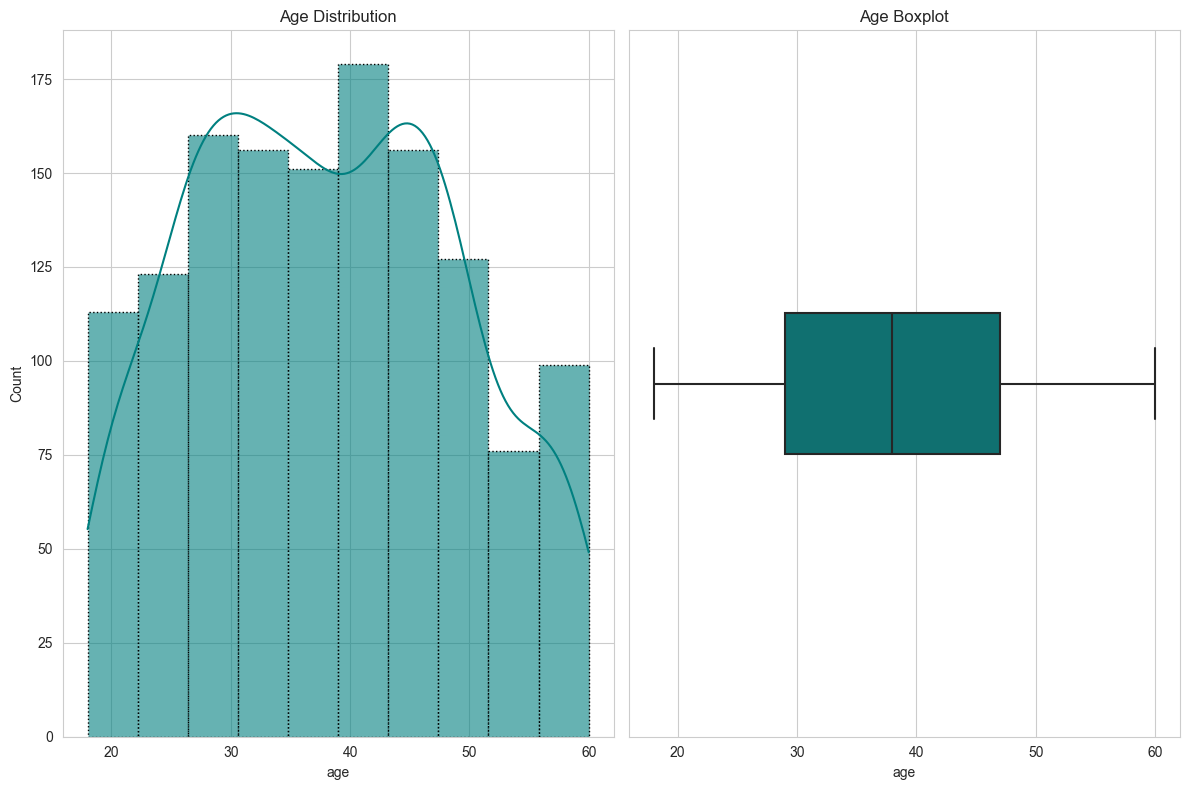

In [76]:
fig, axes= plt.subplots(nrows= 1, ncols= 2, figsize= (12, 8))

sns.histplot(df.age, kde= True, linewidth= 1, linestyle= ":", color= "teal", edgecolor= 'black', bins= 10, alpha= 0.6, ax= axes[0])
axes[0].set_title("Age Distribution")
sns.boxplot(x= df.age, ax= axes[1], color= 'teal', linewidth= 1.5, width= 0.2)
axes[1].set_title('Age Boxplot')

plt.tight_layout()
plt.show()

In [68]:
df.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
PatientID,,,,,,,,,,
1,1,39,male,23.2,91,True,0,False,southeast,1121.87
2,2,24,male,30.1,87,False,0,False,southeast,1131.51
3,3,38,male,33.3,82,True,0,False,southeast,1135.94
4,4,38,male,33.7,80,False,0,False,northwest,1136.40
5,5,38,male,34.1,100,False,0,False,northwest,1137.01
